In [1]:
import numpy as np
import pandas as pd

batting = pd.read_csv("batting_6agg.csv")

batting.head()

,player_id,start_year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,castrra01,1999,207,466.0,40.0,99.0,17.0,0.0,18.0,53.0,0.0,0.0,56.0,116.0,15.0,2.0,1.0,6.0,7.0
1,wisede01,2000,147,296.0,41.0,60.0,13.0,5.0,9.0,30.0,12.0,1.0,14.0,48.0,1.0,2.0,2.0,1.0,1.0
2,jeterde01,1995,786,3130.0,605.0,1008.0,153.0,35.0,78.0,414.0,108.0,37.0,341.0,572.0,11.0,48.0,23.0,23.0,66.0
3,husonje01,1988,462,1143.0,153.0,266.0,42.0,9.0,6.0,85.0,43.0,14.0,136.0,148.0,7.0,3.0,28.0,10.0,29.0
4,izturce01,2001,658,2437.0,261.0,632.0,111.0,22.0,11.0,191.0,59.0,34.0,121.0,259.0,15.0,6.0,38.0,13.0,41.0


In [2]:
batting["start_year_agg"] = np.floor((batting["start_year"] - 1970)/5)
batting.head()

,player_id,start_year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,start_year_agg
0,castrra01,1999,207,466.0,40.0,99.0,17.0,0.0,18.0,53.0,0.0,0.0,56.0,116.0,15.0,2.0,1.0,6.0,7.0,5.0
1,wisede01,2000,147,296.0,41.0,60.0,13.0,5.0,9.0,30.0,12.0,1.0,14.0,48.0,1.0,2.0,2.0,1.0,1.0,6.0
2,jeterde01,1995,786,3130.0,605.0,1008.0,153.0,35.0,78.0,414.0,108.0,37.0,341.0,572.0,11.0,48.0,23.0,23.0,66.0,5.0
3,husonje01,1988,462,1143.0,153.0,266.0,42.0,9.0,6.0,85.0,43.0,14.0,136.0,148.0,7.0,3.0,28.0,10.0,29.0,3.0
4,izturce01,2001,658,2437.0,261.0,632.0,111.0,22.0,11.0,191.0,59.0,34.0,121.0,259.0,15.0,6.0,38.0,13.0,41.0,6.0


In [3]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(batting["start_year_agg"])
binarized = lb.transform(batting["start_year_agg"])
bin_df = pd.DataFrame(binarized)
bin_df = bin_df.rename(columns={0:"1970-74", 1: "1975-79", 2: "1980-84", 3: "1985-89", 4: "1990-94", 5: "1995-99", 6: "2000-04", 7: "2005-09"})
bin_df.head()
batting = pd.merge(batting, bin_df, how='left', left_index=True, right_index=True)
del batting["start_year"]
del batting["start_year_agg"]
batting.head()

,player_id,g,ab,r,h,double,triple,hr,rbi,sb,...,sf,g_idp,1970-74,1975-79,1980-84,1985-89,1990-94,1995-99,2000-04,2005-09
0,castrra01,207,466.0,40.0,99.0,17.0,0.0,18.0,53.0,0.0,...,6.0,7.0,0,0,0,0,0,1,0,0
1,wisede01,147,296.0,41.0,60.0,13.0,5.0,9.0,30.0,12.0,...,1.0,1.0,0,0,0,0,0,0,1,0
2,jeterde01,786,3130.0,605.0,1008.0,153.0,35.0,78.0,414.0,108.0,...,23.0,66.0,0,0,0,0,0,1,0,0
3,husonje01,462,1143.0,153.0,266.0,42.0,9.0,6.0,85.0,43.0,...,10.0,29.0,0,0,0,1,0,0,0,0
4,izturce01,658,2437.0,261.0,632.0,111.0,22.0,11.0,191.0,59.0,...,13.0,41.0,0,0,0,0,0,0,1,0


In [4]:
yvals = pd.read_csv('yvals_avg_rc.csv')

yvals.head()

,player_id,rc_per_ab
0,castrra01,0.130536
1,wisede01,0.098631
2,jeterde01,0.142526
3,husonje01,0.076525
4,izturce01,0.081895


In [5]:
#create classifier

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(activation='relu', hidden_layer_sizes = (18, 6), solver='lbfgs', alpha =1, random_state=1234)
MLP_for_grid = MLPRegressor(activation='relu', hidden_layer_sizes = (18, 6), solver='lbfgs', random_state=1234)

In [6]:
features = ['g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb',
            'cs', 'bb', 'so', 'hbp', 'sh', 'sf', 'g_idp']

#Note: No sabermetric data yet; also no height/weight;
#also, we have to figure out how to handle year (which is ordinal not continuous)
#It doesn't like Ibb for whatever reason

Xframe = batting[features]

X = Xframe.as_matrix()
y = yvals['rc_per_ab'].as_matrix()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=54321)

Scaler = MinMaxScaler()
Scaler.fit(Xtrain)

Scaler.transform(Xtrain)
Scaler.transform(Xtest)

array([[ 0.66629588,  0.51289111,  0.27785235, ...,  0.28723404,
         0.57692308,  0.41803279],
       [ 0.74527253,  0.6252816 ,  0.5704698 , ...,  0.        ,
         0.26923077,  0.44262295],
       [ 0.81535039,  0.67209011,  0.49395973, ...,  0.0106383 ,
         0.48076923,  0.48360656],
       ..., 
       [ 0.61290323,  0.51689612,  0.41744966, ...,  0.27659574,
         0.38461538,  0.2704918 ],
       [ 0.47385984,  0.33917397,  0.21073826, ...,  0.04255319,
         0.28846154,  0.28688525],
       [ 0.13793103,  0.04530663,  0.0147651 , ...,  0.35106383,
         0.        ,  0.04098361]])

In [7]:
#Now, let's train the model

MLP.fit(Xtrain, Ytrain)

MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(18, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1234,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [8]:
#And, make predictions

preds_test = MLP.predict(Xtest)

preds_train = MLP.predict(Xtrain)

print("First 5 Test Preds")
preds_test[0:5]

First 5 Test Preds


array([ 0.10793892,  0.16272077,  0.12735597,  0.11878277,  0.04303838])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0.5,0,u'Actual RC/AB')

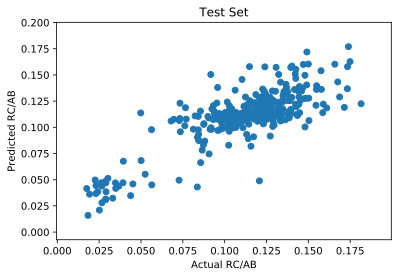

In [10]:
plt.scatter(Ytest, preds_test)
plt.title("Test Set")
plt.ylabel("Predicted RC/AB")
plt.xlabel("Actual RC/AB")

Text(0.5,0,u'Actual RC/AB')

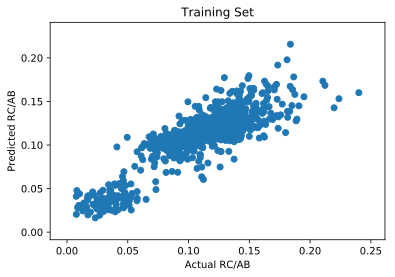

In [11]:
plt.scatter(Ytrain, preds_train)
plt.title("Training Set")
plt.ylabel("Predicted RC/AB")
plt.xlabel("Actual RC/AB")

In [12]:
#Get R2 scores for each set
print("Training R2:")
print(MLP.score(Xtrain, Ytrain))
print("\n")
print("Test R2:")
print(MLP.score(Xtest, Ytest))

Training R2:
0.730384392645


Test R2:
0.674674366111


In [13]:
#Now let's try grid-search for regularization

MLP.get_params()

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (18, 6),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1234,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_dict = {"alpha" : param_grid}

clf = GridSearchCV(MLP_for_grid, param_dict, return_train_score=True, scoring='r2')
clf.fit(X, y)

clf.cv_results_

{'mean_fit_time': array([ 0.01933344,  0.0133334 ,  0.01300001,  0.01633334,  0.01733335,
         0.18466671,  0.13133327,  0.06700007]),
 'mean_score_time': array([ 0.0006667 ,  0.        ,  0.0006667 ,  0.00033331,  0.00066678,
         0.00033331,  0.0006667 ,  0.        ]),
 'mean_test_score': array([-0.00586627, -0.00586626, -0.00586614, -0.00586496, -0.00585426,
         0.70662205,  0.63716125,  0.34812741]),
 'mean_train_score': array([ -2.88657986e-15,  -2.85179288e-13,  -2.85109714e-11,
         -2.82946148e-09,  -2.61777804e-07,   7.19748988e-01,
          6.45116355e-01,   3.51573930e-01]),
 'param_alpha': masked_array(data = [1e-05 0.0001 0.001 0.01 0.1 1 10 100],
              mask = [False False False False False False False False],
        fill_value = ?),
 'params': [{'alpha': 1e-05},
  {'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'rank_test_score': array([8, 7, 6, 5, 4, 1, 2, 3]),
 's

In [15]:
clf.best_score_

0.70662205173558124

In [16]:
#Now, try Decision Tree Classifier

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 4, random_state=1234)
DTR.fit(Xtrain, Ytrain)
tree_pred_train = DTR.predict(Xtrain)

Text(0.5,0,u'Actual RC/AB')

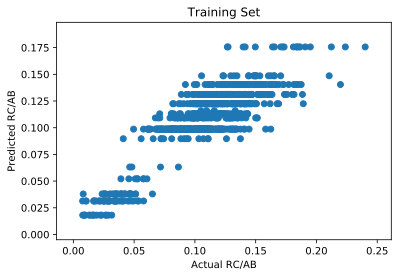

In [17]:
plt.scatter(Ytrain, tree_pred_train)
plt.title("Training Set")
plt.ylabel("Predicted RC/AB")
plt.xlabel("Actual RC/AB")

Text(0.5,0,u'Actual RC/AB')

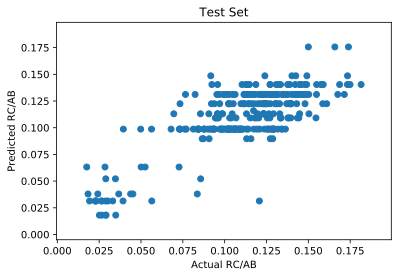

In [18]:
tree_pred_test = DTR.predict(Xtest)

plt.scatter(Ytest, tree_pred_test)
plt.title("Test Set")
plt.ylabel("Predicted RC/AB")
plt.xlabel("Actual RC/AB")

In [19]:
#Get R2 scores for each set
print("Training R2:")
print(DTR.score(Xtrain, Ytrain))
print("\n")
print("Test R2:")
print(DTR.score(Xtest, Ytest))

Training R2:
0.738301525506


Test R2:
0.625035477755


In [20]:
DTR_2 = DecisionTreeRegressor(random_state=1234)
mx_dpth = [2, 3, 4, 5, 6, 7]
mn_lf_splt = [1, 2, 3, 4]
param_dict_rf = {'max_depth': mx_dpth, 'min_samples_leaf' : mn_lf_splt}
clf_rf = GridSearchCV(DTR_2, param_dict_rf, return_train_score=True, scoring='r2')

In [21]:
clf_rf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [22]:
clf_rf.cv_results_

{'mean_fit_time': array([ 0.0016667 ,  0.00199993,  0.0023334 ,  0.00200001,  0.00300002,
         0.00300002,  0.00299994,  0.00266663,  0.00366672,  0.00333333,
         0.00266671,  0.00299994,  0.00366672,  0.00366664,  0.00399995,
         0.00366672,  0.00466673,  0.00400003,  0.00433326,  0.00499996,
         0.00533342,  0.00499996,  0.00466673,  0.00500003]),
 'mean_score_time': array([ 0.00033331,  0.00100001,  0.0006667 ,  0.00033339,  0.00033331,
         0.        ,  0.        ,  0.00033339,  0.        ,  0.00033331,
         0.        ,  0.00033339,  0.00033331,  0.        ,  0.        ,
         0.0006667 ,  0.00033331,  0.00099993,  0.00066678,  0.        ,
         0.00033331,  0.00033331,  0.00066662,  0.00033331]),
 'mean_test_score': array([ 0.62641687,  0.62641687,  0.62641687,  0.62641687,  0.65070563,
         0.65270412,  0.65270412,  0.65557149,  0.65409247,  0.65625003,
         0.65970333,  0.66213716,  0.63399398,  0.63636868,  0.64273756,
         0.6502048

In [23]:
clf_rf.best_params_

{'max_depth': 4, 'min_samples_leaf': 4}

In [24]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')

In [25]:
#Cval = [0.01, 0.1, 1]
#eps = [0.01, 0.1, 1]
Cval = [0.01, 0.1, 1, 10]
eps = [0.001, 0.01, 0.1]
gamma = [0.0001, 0.00001, 0.000001, 0.0000001]
svm_dict = {'C': Cval, 'epsilon' : eps, 'gamma' : gamma}
clf_svm = GridSearchCV(svr, svm_dict, return_train_score=True, scoring='r2')
clf_svm.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epsilon': [0.001, 0.01, 0.1], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 1e-05, 1e-06, 1e-07]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [26]:
clf_svm.best_score_

0.72347441335322116

In [27]:
clf_svm.cv_results_

{'mean_fit_time': array([  8.99999142e-02,   3.99999619e-02,   3.46666972e-02,
          3.49999269e-02,   3.13332876e-02,   2.73333391e-02,
          2.23333041e-02,   2.40000089e-02,   6.66697820e-04,
          9.99927521e-04,   1.00000699e-03,   3.33388646e-04,
          6.93333149e-02,   5.80000083e-02,   3.99999619e-02,
          3.66667112e-02,   3.99999619e-02,   3.83333365e-02,
          2.43333975e-02,   2.40000089e-02,   6.66618347e-04,
          3.33309174e-04,   3.33388646e-04,   6.66697820e-04,
          9.86665885e-02,   1.28333410e-01,   6.20000362e-02,
          4.80000973e-02,   5.46666781e-02,   7.23333359e-02,
          4.13332780e-02,   3.53333155e-02,   6.66697820e-04,
          1.00008647e-03,   1.33323669e-03,   1.00008647e-03,
          1.82666620e-01,   6.25000000e-01,   2.12333282e-01,
          9.36667124e-02,   6.53332869e-02,   2.65666723e-01,
          1.51666641e-01,   8.40000312e-02,   6.66697820e-04,
          1.00000699e-03,   3.33309174e-04,   0.00000

In [28]:
clf_svm.best_params_

{'C': 1, 'epsilon': 0.01, 'gamma': 1e-06}